In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, VotingClassifier
from sklearn.metrics import accuracy_score


# load dataset
df = pd.read_csv('heart.csv')
df.head()



,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0


In [ ]:
# extract features
X = df[['restecg', 'chol']].values
y = df['target'].values


# feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)

# split dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)


# Random Forest
rf = RandomForestClassifier(random_state=0)
rf.fit(X_train, y_train)
rf_train_acc = accuracy_score(y_train, rf.predict(X_train))
rf_test_acc = accuracy_score(y_test, rf.predict(X_test))

# AdaBoost
ada = AdaBoostClassifier(random_state=0, algorithm='SAMME')
ada.fit(X_train, y_train)
ada_train_acc = accuracy_score(y_train, ada.predict(X_train))
ada_test_acc = accuracy_score(y_test, ada.predict(X_test))


print(f'Random Forest - Train Accuracy: {rf_train_acc:.4f}, Test Accuracy: {rf_test_acc:.4f}')
print(f'AdaBoost - Train Accuracy: {ada_train_acc:.4f}, Test Accuracy: {ada_test_acc:.4f}')



Random Forest - Train Accuracy: 0.8841, Test Accuracy: 0.8390
AdaBoost - Train Accuracy: 0.6171, Test Accuracy: 0.5561


In [5]:
# hard voting and soft voting
hardvote = VotingClassifier(estimators=[('rf',rf), ('ada', ada)], voting='hard')
softvote = VotingClassifier(estimators=[('rf',rf), ('ada', ada)], voting='soft')

hardvote.fit(X_train, y_train)
softvote.fit(X_train, y_train)

hardacc = accuracy_score(y_test, hardvote.predict(X_test))
softacc = accuracy_score(y_test, softvote.predict(X_test))

print(f"Hard voting {round(hardacc, 4)}")
print(f"Soft voting {round(softacc, 4)}")

Hard voting 0.7268
Soft voting 0.8439


best vote soft


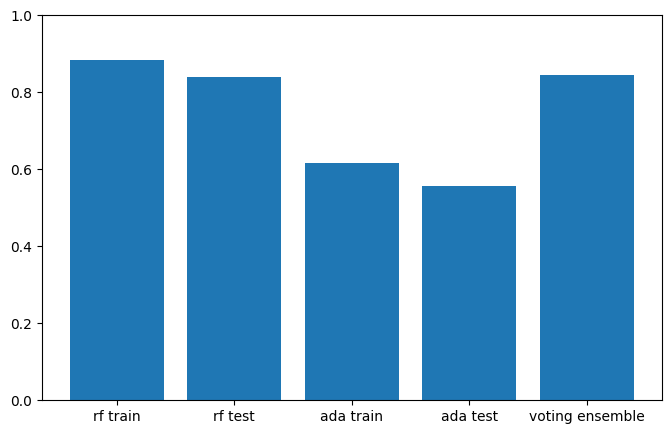

In [9]:
bestvote = "soft" if softacc > hardacc else "hard"
print(f"best vote {bestvote}")

labels = ["rf train", "rf test", "ada train", "ada test", "voting ensemble"]
acc_values = [rf_train_acc, rf_test_acc, ada_train_acc, ada_test_acc, max(hardacc, softacc)]

plt.figure(figsize=(8,5))
plt.bar(labels, acc_values)
plt.ylim(0,1)
plt.show()